In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Get the height/weight data

In [2]:
data = pd.read_html( "http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html" )

In [3]:
data = data[0].drop( columns = 0 )
data = data.drop( index = 0 )
data.columns = [ "height", "weight" ]
data.reset_index( drop = True, inplace = True )

In [4]:
data.height = data.height.apply( lambda x : float(x) )
data.weight = data.weight.apply( lambda x : float(x) )

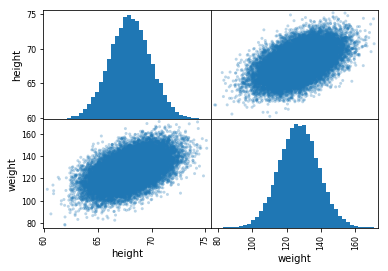

,height,weight
height,1.000000,0.502859
weight,0.502859,1.000000


In [5]:
pd.plotting.scatter_matrix( data, alpha = 0.3, hist_kwds = { "bins" : 40} )
plt.show()
data.corr()

# Create a training/test split

In [6]:
height = data.height.values.reshape( (len(data), 1) )
weight = data.weight.values.reshape( (len(data), 1) )
trHeight, teHeight, trWeight, teWeight = train_test_split( height, weight,
                                                           test_size = 0.20,
                                                           random_state = 0 )

## Predict weight given height

### Linear model

In [7]:
hwLin = LinearRegression()
hwLin.fit( trHeight, trWeight )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Random forest model

In [8]:
params = { "n_estimators" : [2, 3, 4, 5, 6, 7, 8, 9, 10 ,12, 16, 18, 20, 30 ],
           "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20 ,30 ],
           "min_samples_leaf" : [1, 2, 4, 5, 10 ,15, 20, 40, 60, 100 ] }

forest = RandomForestRegressor()

gridForest = GridSearchCV( forest, params, cv = 10, n_jobs = -1, verbose = 1 )
gridForest.fit( trHeight, trWeight.reshape( len(trWeight)) )

Fitting 10 folds for each of 1820 candidates, totalling 18200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 239 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 489 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 839 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 1420 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9176 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 11394 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 13294 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 15394 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 16679 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 18055 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 18200 out of 18200 | elapsed:  7.7min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 18, 20, 30], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30], 'min_samples_leaf': [1, 2, 4, 5, 10, 15, 20, 40, 60, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [9]:
gridForest.best_score_

0.24834019740138924

In [10]:
gridForest.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'n_estimators': 18}

In [11]:
hwForest = RandomForestRegressor()
hwForest.fit( trHeight, trWeight.reshape( len(trWeight) ) )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Evaluate the models

In [12]:
predTrLin = hwLin.predict( trHeight )
predTeLin = hwLin.predict( teHeight )

predTrFor = hwForest.predict( trHeight )
predTeFor = hwForest.predict( teHeight )

trErrLin = mean_squared_error( trWeight, predTrLin )
teErrLin = mean_squared_error( teWeight, predTeLin )

trErrFor = mean_squared_error( trWeight, predTrFor )
teErrFor = mean_squared_error( teWeight, predTeFor )

print( "Linear Model:" )
print( f"  Training error: {trErrLin}")
print( f"  Test error: {teErrLin}")

print( "\nRandom Forest Model:" )
print( f"  Training error: {trErrFor}")
print( f"  Test error: {teErrFor}")

Linear Model:
  Training error: 100.72831961844068
  Test error: 105.05298919282606

Random Forest Model:
  Training error: 26.134703944123608
  Test error: 155.80699549451145


## Predict height given weight

### Linear model

In [13]:
whLin = LinearRegression()
whLin.fit( trWeight, trHeight )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
predTr = whLin.predict( trWeight )
predTe = whLin.predict( teWeight )
trErr = mean_squared_error( trHeight, predTr )
teErr = mean_squared_error( teHeight, predTe )

print( f"Training error: {trErr}")
print( f"Test error: {teErr}")

Training error: 2.697343829079675
Test error: 2.7200258539895246


### Random forest model

In [15]:
params = { "n_estimators" : [2, 3, 4, 5, 6, 7, 8, 9, 10 ,12, 16, 18, 20, 30 ],
           "max_depth" : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20 ,30 ],
           "min_samples_leaf" : [1, 2, 4, 5, 10 ,15, 20, 40, 60, 100 ] }

forest = RandomForestRegressor()

gridForest = GridSearchCV( forest, params, cv = 10, n_jobs = -1, verbose = 1 )
gridForest.fit( trWeight, trHeight.reshape( len(trHeight)) )

Fitting 10 folds for each of 1820 candidates, totalling 18200 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 239 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 489 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 839 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 1289 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 3169 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5769 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8769 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 11661 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 13561 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 15601 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 16937 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 18200 out of 18200 | elapsed:  7.7min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16, 18, 20, 30], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30], 'min_samples_leaf': [1, 2, 4, 5, 10, 15, 20, 40, 60, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [16]:
gridForest.best_score_

0.24850676864604992

In [17]:
gridForest.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'n_estimators': 18}

In [18]:
whForest = RandomForestRegressor()
whForest.fit( trWeight, trHeight.reshape( len(trHeight)) )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Evaluate the models

In [19]:
predTrLin = whLin.predict( trWeight )
predTeLin = whLin.predict( teWeight )

predTrFor = whForest.predict( trWeight )
predTeFor = whForest.predict( teWeight )

trErrLin = mean_squared_error( trHeight, predTrLin )
teErrLin = mean_squared_error( teHeight, predTeLin )

trErrFor = mean_squared_error( trHeight, predTrFor )
teErrFor = mean_squared_error( teHeight, predTeFor )

print( "Linear Model:" )
print( f"  Training error: {trErrLin}")
print( f"  Test error: {teErrLin}")

print( "\nRandom Forest Model:" )
print( f"  Training error: {trErrFor}")
print( f"  Test error: {teErrFor}")

Linear Model:
  Training error: 2.697343829079675
  Test error: 2.7200258539895246

Random Forest Model:
  Training error: 0.7175864483595812
  Test error: 4.189164353863368
